# Feature Creation

### All Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import display, HTML, Markdown
from glob import glob
from word_list.basic import politics1, politics2
from word_list.basic import business
from statsmodels.tsa.stattools import adfuller

In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

## Organizing Google trends data

Let ${S^{w}}_t$ be the search interest in the word $w$ at day $t$.

,act,bank,blacklist,business,carolina,case,ceo,college,committee,community,companies,corporation,council,county,court,democratic,democratic,development,district,economic,elected,election,election,elections,energy,federal,financial,firm,founded,georgia,global,government,government,governor,illinois,inc,industry,investment,judge,justice,kentucky,law,law,legal,ltd,management,market,marketing,massachusetts,media,members,million,minister,ministry,missouri,movement,notability,ohio,party,pennsylvania,police,political,president,president,products,project,representatives,republican,rights,seats,secretary,security,senate,served,service,services,social,stats,technology,tennessee,texas,union,vermont,virginia,voters,votes,washington,william,wisconsin,york
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,14.0,52.0,1.0,46.0,55.0,31.0,0.0,63.0,4.0,49.0,21.0,14.0,9.0,52.0,20.0,5.0,5.0,10.0,22.0,4.0,0.0,5.0,5.0,1.0,13.0,33.0,16.0,1.0,1.0,43.0,11.0,17.0,17.0,2.0,37.0,28.0,4.0,7.0,4.0,6.0,16.0,35.0,35.0,14.0,4.0,25.0,26.0,9.0,27.0,45.0,7.0,6.0,0.0,3.0,26.0,2.0,0.0,58.0,35.0,28.0,26.0,6.0,8.0,8.0,26.0,25.0,2.0,4.0,7.0,6.0,3.0,31.0,1.0,1.0,76.0,32.0,19.0,8.0,20.0,20.0,66.0,44.0,24.0,53.0,1.0,1.0,60.0,28.0,36.0,80.0
2004-01-02,17.0,90.0,2.0,66.0,49.0,26.0,1.0,81.0,3.0,63.0,18.0,20.0,11.0,82.0,33.0,5.0,5.0,17.0,32.0,5.0,0.0,3.0,3.0,2.0,17.0,47.0,31.0,5.0,1.0,48.0,16.0,26.0,26.0,3.0,53.0,35.0,10.0,10.0,3.0,6.0,15.0,52.0,52.0,14.0,7.0,36.0,27.0,13.0,27.0,41.0,6.0,4.0,2.0,3.0,24.0,4.0,0.0,63.0,33.0,32.0,30.0,10.0,11.0,11.0,36.0,28.0,1.0,3.0,10.0,6.0,10.0,43.0,3.0,1.0,93.0,59.0,24.0,4.0,26.0,18.0,77.0,54.0,16.0,61.0,1.0,1.0,80.0,32.0,36.0,91.0
2004-01-03,16.0,67.0,1.0,51.0,40.0,27.0,3.0,70.0,3.0,49.0,16.0,13.0,9.0,69.0,23.0,5.0,5.0,16.0,26.0,2.0,1.0,3.0,3.0,1.0,12.0,34.0,14.0,3.0,1.0,41.0,14.0,19.0,19.0,2.0,44.0,23.0,10.0,7.0,3.0,7.0,15.0,43.0,43.0,13.0,8.0,27.0,32.0,8.0,27.0,40.0,8.0,3.0,2.0,5.0,23.0,6.0,0.0,65.0,36.0,27.0,26.0,7.0,10.0,10.0,31.0,27.0,2.0,4.0,8.0,5.0,5.0,28.0,2.0,1.0,70.0,33.0,22.0,6.0,22.0,17.0,67.0,43.0,14.0,55.0,1.0,1.0,72.0,29.0,34.0,75.0
2004-01-04,18.0,57.0,0.0,51.0,51.0,26.0,1.0,68.0,3.0,50.0,18.0,13.0,10.0,67.0,27.0,8.0,8.0,19.0,31.0,5.0,1.0,4.0,4.0,1.0,18.0,29.0,17.0,4.0,1.0,46.0,12.0,21.0,21.0,2.0,43.0,28.0,9.0,8.0,3.0,8.0,14.0,46.0,46.0,11.0,5.0,26.0,25.0,9.0,26.0,43.0,6.0,5.0,3.0,3.0,20.0,3.0,0.0,60.0,41.0,26.0,32.0,10.0,10.0,10.0,27.0,31.0,2.0,5.0,14.0,6.0,4.0,30.0,2.0,1.0,79.0,38.0,21.0,8.0,24.0,21.0,70.0,37.0,16.0,56.0,1.0,1.0,68.0,34.0,29.0,85.0
2004-01-05,21.0,50.0,0.0,52.0,47.0,26.0,4.0,100.0,4.0,88.0,19.0,10.0,11.0,71.0,28.0,9.0,9.0,19.0,58.0,6.0,2.0,5.0,5.0,2.0,11.0,25.0,18.0,8.0,3.0,38.0,10.0,25.0,25.0,5.0,36.0,30.0,7.0,10.0,5.0,5.0,14.0,52.0,52.0,16.0,4.0,36.0,22.0,13.0,24.0,43.0,5.0,4.0,3.0,6.0,20.0,6.0,0.0,49.0,30.0,21.0,30.0,7.0,13.0,13.0,29.0,28.0,2.0,6.0,12.0,4.0,3.0,35.0,2.0,2.0,70.0,44.0,17.0,6.0,21.0,19.0,66.0,31.0,12.0,57.0,2.0,2.0,67.0,39.0,30.0,70.0


#### shape = (6061, 90)

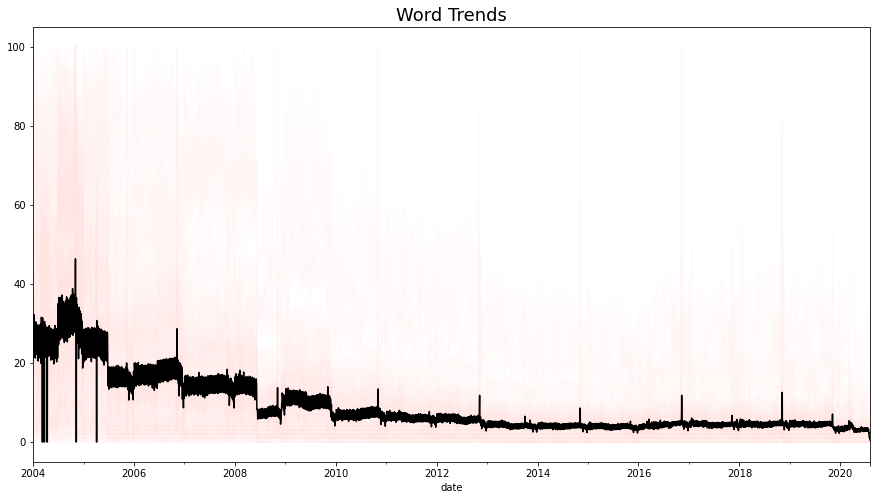

In [2]:
trends_path = os.path.join('data','daily_trend',"*.csv")
daily_dfs_path =  glob(trends_path)
daily_dfs_path.sort()
daily_dfs = [pd.read_csv(path) for path in daily_dfs_path]
daily_dfs_names = [i.split("/")[2] for i in daily_dfs_path]
daily_dfs_names = [i.split(".")[0] for i in daily_dfs_names]

trends_list = []
for name, df in zip(daily_dfs_names, daily_dfs):
    df.index = pd.to_datetime(df.date)
    ts = df[name]
    new_name = name.replace(" ", "_")
    ts.name = new_name
    trends_list.append(ts)

trends = pd.concat(trends_list,1)
trends = trends.fillna(0.0)
selected_words = politics1 + politics2 + business
selected_words.sort()
trends = trends[selected_words]

display(HTML(trends.head(5).to_html()))
display(Markdown("#### shape = {}".format(trends.shape))) 

fig, ax = plt.subplots(figsize=(15,8))
trends.plot(ax=ax,legend=False,alpha= 0.05,  color="mistyrose");
trends.mean(1).plot(ax=ax,legend=False, color="k", label="mean trend");
ax.set_title("Word Trends", fontsize=18);

## Creating Features

For $k \in \{1, \dots, K\}$ and word $w$, we define the word feature ${D^{w}}_t$ as the $k$ difference:

\begin{equation}
{D^{w}}_{k,t} = {S^{w}}_t - {S^{w}}_{t-k}
\end{equation}


In [3]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
adfuller(trends["act"], maxlag=10)

(-4.033893906084358,
 0.001243070087048759,
 8,
 6052,
 {'1%': -3.4314309774945917,
  '5%': -2.862017693439628,
  '10%': -2.5670242736523603},
 25501.399707896308)

In [4]:
adfuller(trends["bank"].diff().dropna())

(-17.49234775449427,
 4.429968429582136e-30,
 34,
 6025,
 {'1%': -3.4314358237753178,
  '5%': -2.8620198346625063,
  '10%': -2.567025413481173},
 36786.14982407662)